In [9]:
# code courtesy of Adam Dempsey
# modified for PHY1055 by Oisín Creaner
import matplotlib.pyplot as plt
import numpy as np

x0 = 1
t = np.linspace(x0, 10, 101)
dx = 0

r = 1
K = 0.1





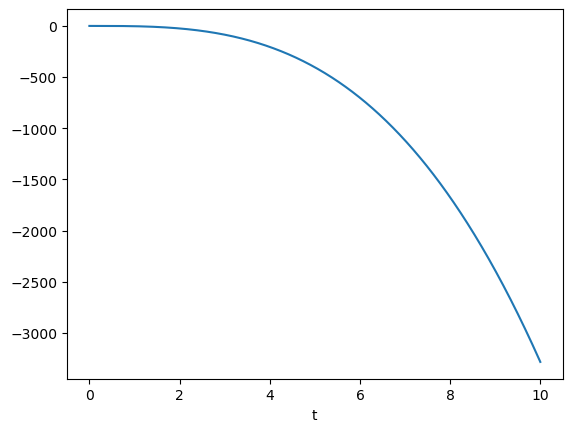

In [10]:
# code courtesy of Adam Dempsey
# modified for PHY1055 by Oisín Creaner

import numpy as np
import matplotlib.pyplot as plt

from scipy import integrate
from pathlib import Path


def verhulst(x, t, r, k):
    dx = r*x * (1 - x/k)
    return dx

'''
def generate_path(home_folder=str(Path.home()), subfolder='/Documents/', basename='output', extension='txt'):
    # creates the path to store the data. Note that the data is not stored in the code repo directory.
    # uses the method Path.home() to find the home directory in any OS
    output_folder = home_folder + subfolder  # appends a subdirectory within it.
    filename = basename + '.' + extension  # defines the filename the output is to be saved in
    output_path = output_folder + filename  # creates the output path
    return output_path
'''

# define the initial parameters
x0 = 0  # initial position
t0 = 0  # initial time

r = 1
k = 0.1


# define the final time and the number of time steps
tf = 10  # final time
n = 1001  # Number of points at which output will be evaluated
# Note: this does not mean the integrator will take only n steps
# Scipy will take more steps if required to control the error in the solution

# creates an array of the time steps
t = np.linspace(t0, tf, n)  # Points at which output will be evaluated

# Calls the method integrate.solve_ivp()
result = integrate.solve_ivp(fun=verhulst,  # The function defining the derivative
                             t_span=(t0, tf),  # Initial and final times
                             y0=[x0],  # Initial state
                             args=(r, k),
                             method="RK45",  # Integration method
                             t_eval=t)  # Time points for result to be defined at

# Read the solution and time from the result array returned by Scipy
x = result.y[0]
t = result.t



plt.figure()

# plot position ad velocity as a function of time.
plt.plot(t, x, label=r"x(t)")
plt.xlabel(r"t")
#ax[0].legend(loc=1)



plt.show()

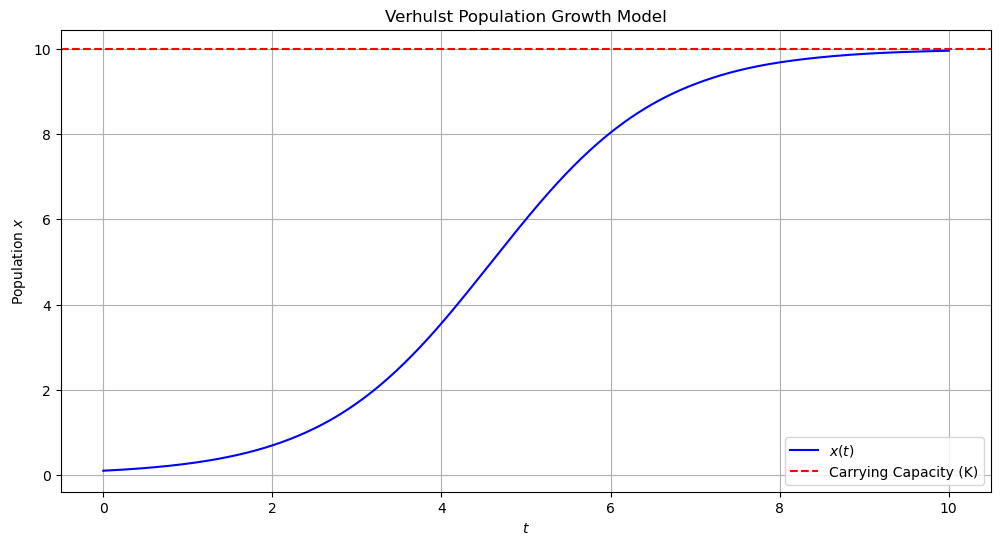

In [11]:
# Code courtesy of Adam Dempsey
# Modified for PHY1055 by Oisín Creaner

import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from pathlib import Path


def verhulst(t, x, r, k):
    dx = r * x * (1 - x / k)  # Corrected the multiplication operator
    return dx


# Define the initial parameters
x0 = 0.1  # Initial population (must be greater than 0)
t0 = 0  # Initial time

r = 1
k = 10  # Carrying capacity (should be greater than initial population)


# Define the final time and the number of time steps
tf = 10  # Final time
n = 1001  # Number of points at which output will be evaluated

# Creates an array of the time steps
t = np.linspace(t0, tf, n)  # Points at which output will be evaluated

# Calls the method integrate.solve_ivp()
result = integrate.solve_ivp(fun=verhulst,  # The function defining the derivative
                             t_span=(t0, tf),  # Initial and final times
                             y0=[x0],  # Initial state (as a list)
                             args=(r, k),  # Additional arguments for the function
                             method="RK45",  # Integration method
                             t_eval=t)  # Time points for result to be defined at

# Read the solution and time from the result array returned by Scipy
x = result.y[0]  # Correctly extracting the population values
t = result.t

# Create a plot for the population over time
plt.figure(figsize=(12, 6))
plt.plot(t, x, label=r"$x(t)$", color='blue')
plt.xlabel(r"$t$")
plt.ylabel(r"Population $x$")
plt.title("Verhulst Population Growth Model")
plt.axhline(y=k, color='red', linestyle='--', label='Carrying Capacity (K)')
plt.legend()
plt.grid()
plt.show()
